Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


Load Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Exploratory Data Analysis (EDA)

In [3]:
# Shape & Info
df.shape
df.info()
# Missing Values
df.isnull().sum()
# Summary Statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Data Cleaning

In [5]:
from sklearn.impute import SimpleImputer

# Age → Median
age_imputer = SimpleImputer(strategy="median")
df["Age"] = age_imputer.fit_transform(df[["Age"]]).ravel()

# Embarked → Mode
embarked_imputer = SimpleImputer(strategy="most_frequent")
df["Embarked"] = embarked_imputer.fit_transform(df[["Embarked"]]).ravel()

# Drop Cabin
df.drop(columns=["Cabin"], inplace=True)



Handling Noisy Data (Outliers)

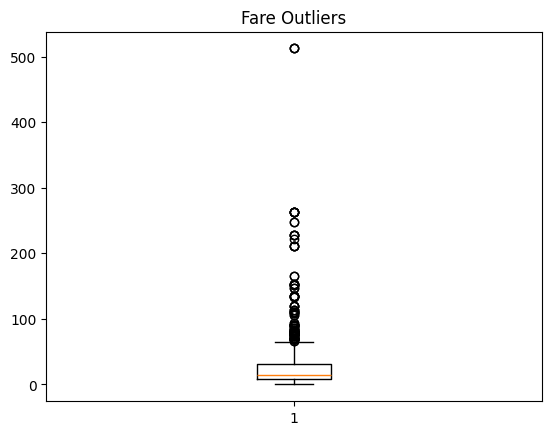

In [6]:
# Fare Outliers
plt.boxplot(df["Fare"])
plt.title("Fare Outliers")
plt.show()
# Log Transformation
df["Fare_log"] = np.log1p(df["Fare"])


In [7]:
# Encoding Categorical Variables
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])


<Figure size 1000x600 with 0 Axes>

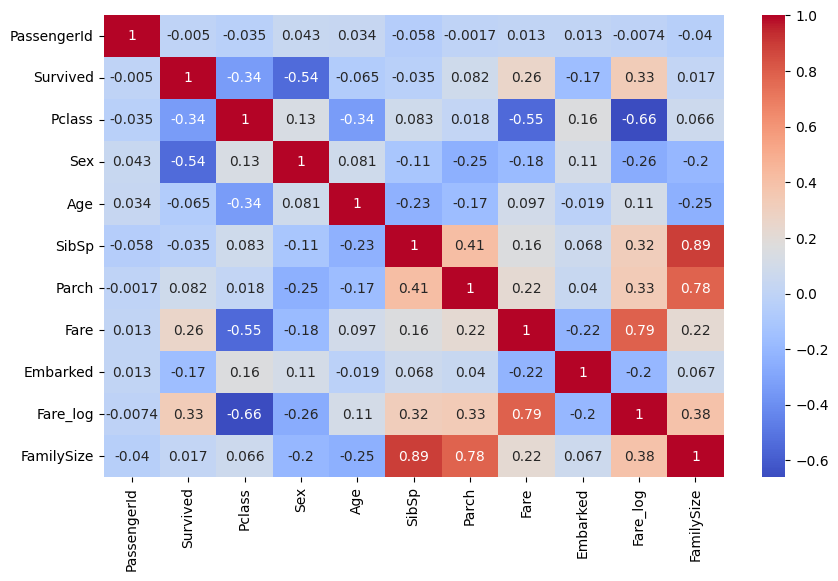

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229      1   
2                             Heikkinen, Miss. Laina    0  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531      1   
4                           Allen, Mr. William Henry    1  0.434531      0   

   Parch            Ticket      Fare  Embarked  Fare_log  FamilySize AgeGroup  
0      0         A/5 21171  0.014151         2 -0.879741           2    Young  
1      0          PC 17599  0.139136         0  1.361220           2    Adult  
2      0  STON/O2. 3101282  0.015469         2 -0.798540           1    Adult  
3      0            113803  0.103644         2  1.062038           2    Adult  
4      0            373450  0.015713         2 -0.784179           1    Adult

In [9]:
# Normalization (Min-Max)
scaler = MinMaxScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

# Standardization
std = StandardScaler()
df[["Fare_log"]] = std.fit_transform(df[["Fare_log"]])
# Attribute Construction (Feature Engineering)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
# Data Discretization
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 0.3, 0.6, 1],
    labels=["Young", "Adult", "Senior"]
)
# Feature Selection (Correlation)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
sns.heatmap(
    df.select_dtypes(include="number").corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()

plt.show()
# Data Reduction
sample_df = df.sample(frac=0.7, random_state=42)
# Dimensionality Reduction (PCA)
X = df.drop("Survived", axis=1)
X = pd.get_dummies(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca
# Final Preprocessed Dataset
df.head()
